<a href="https://colab.research.google.com/github/Marvel280904/W10---DataMining---Marvel/blob/main/AFL_2_DataMining_Marvel_Theofilus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hie

# **Load Data**

1. Country

Deskripsi: Nama negara.

Catatan: Kolom ini digunakan untuk mengidentifikasi negara secara unik.

2. Other names

Deskripsi: Nama alternatif atau sebutan lain untuk negara tersebut. Jika kosong (null), kemungkina
n besar nilainya sama dengan kolom Country.

Catatan: Digunakan untuk mendukung data pengenalan negara jika ada variasi nama.

3. ISO 3166-1 alpha-3 CODE

Deskripsi: Kode ISO 3 huruf unik yang merepresentasikan negara.

Catatan: Berguna untuk analisis atau integrasi dataset karena format ini standar.

4. Population

Deskripsi: Jumlah populasi negara tersebut.

Catatan: Berguna untuk menghitung rasio kasus atau kematian per jumlah populasi.

5. Continent

Deskripsi: Benua tempat negara tersebut berada.

Catatan: Berguna untuk analisis kelompok data berdasarkan wilayah geografis.

6. Total Cases

Deskripsi: Total jumlah kasus yang dilaporkan di negara tersebut.

Catatan: Ini adalah metrik utama untuk melihat dampak suatu kejadian, seperti pandemi.

7. Total Deaths

Deskripsi: Total jumlah kematian yang dilaporkan di negara tersebut.

Catatan: Membantu menghitung tingkat kematian dibandingkan total kasus.

8. Tot Cases//1M pop

Deskripsi: Total kasus per 1 juta populasi.

Catatan: Metrik ini memberikan standar perbandingan antar negara terlepas dari ukuran populasi mereka.

9. Tot Deaths/1M pop

Deskripsi: Total kematian per 1 juta populasi.

Catatan: Berguna untuk analisis proporsi kematian terhadap populasi.

10. Death percentage

Deskripsi: Persentase kematian dibandingkan total kasus.

Rumus: (Total Deaths / Total Cases) * 100.

Catatan: Memberikan gambaran tingkat fatalitas suatu negara.

In [2]:
url = "https://raw.githubusercontent.com/Marvel280904/W10---DataMining---Marvel/refs/heads/main/COVID-19%20Coronavirus.csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


# **Data Cleaning**

In [3]:
df.isnull().sum()

,0
Country,0
Other names,1
ISO 3166-1 alpha-3 CODE,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
Tot Cases//1M pop,0
Tot Deaths/1M pop,0
Death percentage,0


In [4]:
df.drop(['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE'], axis=1, inplace=True)
df.rename(columns={df.columns[4]: 'TtlCasesPer1MPop'}, inplace=True)
df.rename(columns={df.columns[5]: 'TtlDeathsPer1MPop'}, inplace=True)
df.head()

,Population,Continent,Total Cases,Total Deaths,TtlCasesPer1MPop,TtlDeathsPer1MPop,Death percentage
0,40462186,Asia,177827,7671,4395,190,4.313743
1,2872296,Europe,273870,3492,95349,1216,1.275058
2,45236699,Africa,265691,6874,5873,152,2.587216
3,77481,Europe,40024,153,516565,1975,0.382271
4,34654212,Africa,99194,1900,2862,55,1.915438


In [5]:
# Check for null values in the dataset
df.isnull().sum()

,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
TtlCasesPer1MPop,0
TtlDeathsPer1MPop,0
Death percentage,0


# **Exploratory Data Analysis**

In [6]:
df.describe()

,Population,Total Cases,Total Deaths,TtlCasesPer1MPop,TtlDeathsPer1MPop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Population         225 non-null    int64  
 1   Continent          225 non-null    object 
 2   Total Cases        225 non-null    int64  
 3   Total Deaths       225 non-null    int64  
 4   TtlCasesPer1MPop   225 non-null    int64  
 5   TtlDeathsPer1MPop  225 non-null    int64  
 6   Death percentage   225 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 12.4+ KB


In [8]:
# untuk menampilkan jumlah / frekuensi kemunculan setiap nilai unik di setiap kolom dalam dataframe
columns = ['Population', 'Continent', 'Total Cases', 'Total Deaths', 'TtlCasesPer1MPop',
           'TtlDeathsPer1MPop', 'Death percentage']

for col in columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for Population:
Population
40462186    1
5265647     1
290302      1
5002100     1
6762511     1
           ..
10333930    1
56942       1
113436      1
400244      1
15241601    1
Name: count, Length: 225, dtype: int64


Value counts for Continent:
Continent
Africa                             58
Asia                               49
Europe                             48
Latin America and the Caribbean    48
Oceania                            17
Northern America                    5
Name: count, dtype: int64


Value counts for Total Cases:
Total Cases
7          2
177827     1
765213     1
60294      1
693219     1
          ..
16979      1
3077711    1
11971      1
14024      1
246525     1
Name: count, Length: 224, dtype: int64


Value counts for Total Deaths:
Total Deaths
0         8
1         3
63        2
2         2
365       2
         ..
130563    1
1445      1
27684     1
21        1
5446      1
Name: count, Length: 208, dtype: int64


Value counts for TtlCasesPer

<ipython-input-9-cbec2963d79d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Continent", y="Total Cases", data=cases_by_continent, palette="viridis")


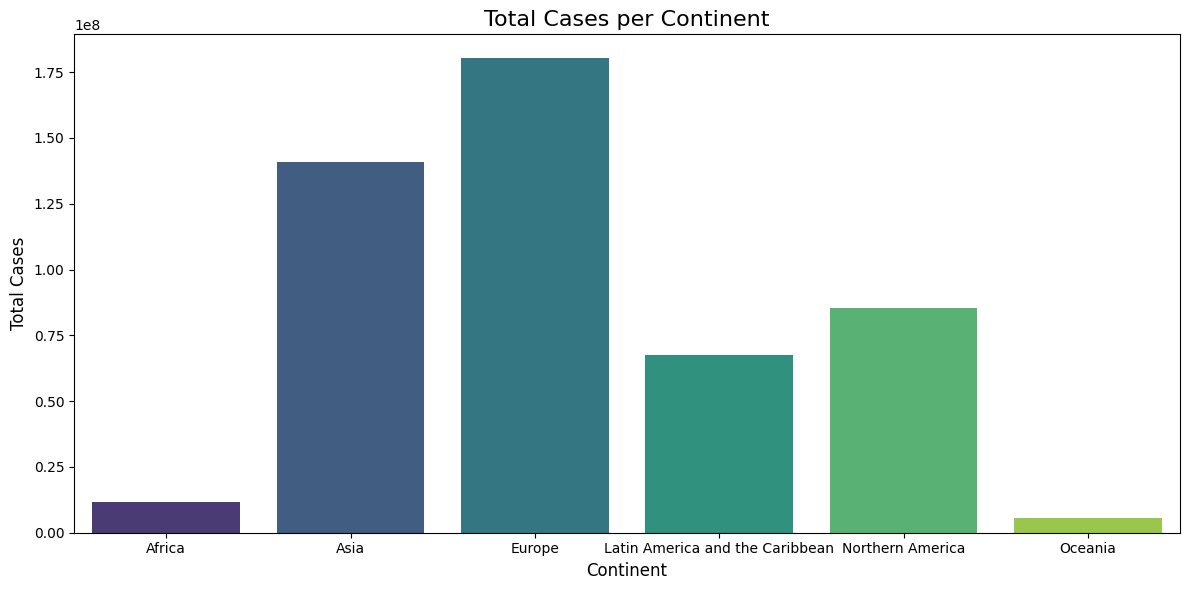

In [9]:
# Menghitung total kasus per benua
cases_by_continent = df.groupby("Continent")["Total Cases"].sum().reset_index()

# Membuat bar plot dengan pengaturan ukuran
plt.figure(figsize=(12, 6))  # Atur ukuran gambar (width=10, height=6)
sns.barplot(x="Continent", y="Total Cases", data=cases_by_continent, palette="viridis")
plt.title("Total Cases per Continent", fontsize=16)
plt.xlabel("Continent", fontsize=12)
plt.ylabel("Total Cases", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  # Supaya layout rapi
plt.show()

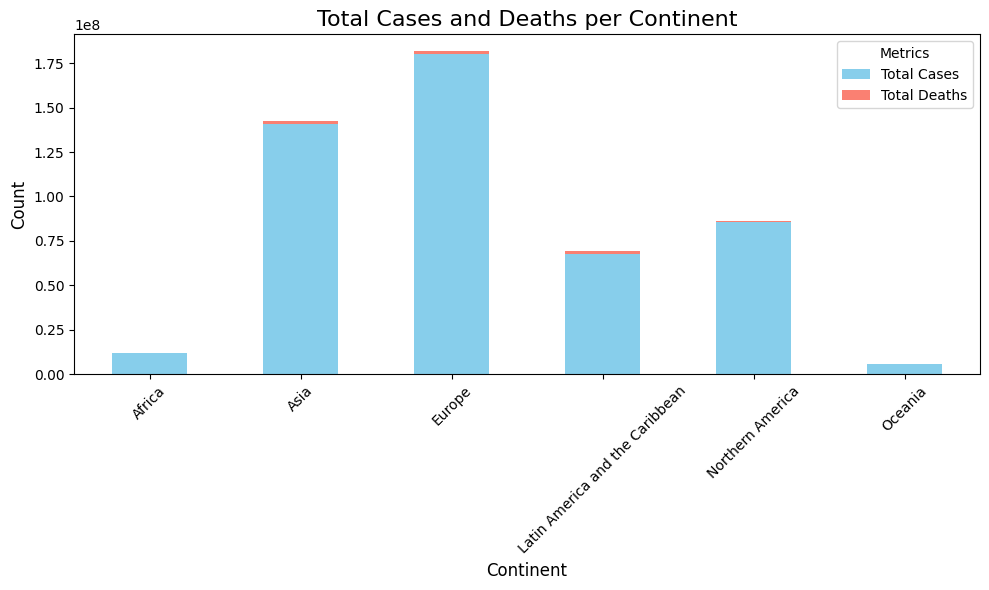

In [10]:
# Menghitung total kasus dan kematian per benua
grouped_data = df.groupby("Continent")[["Total Cases", "Total Deaths"]].sum()

# Membuat stacked bar plot
grouped_data.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["skyblue", "salmon"]
)
plt.title("Total Cases and Deaths per Continent", fontsize=16)
plt.xlabel("Continent", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

<ipython-input-11-880a399e2ff7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=continent_death_percentage.index, y=continent_death_percentage.values, palette="viridis")


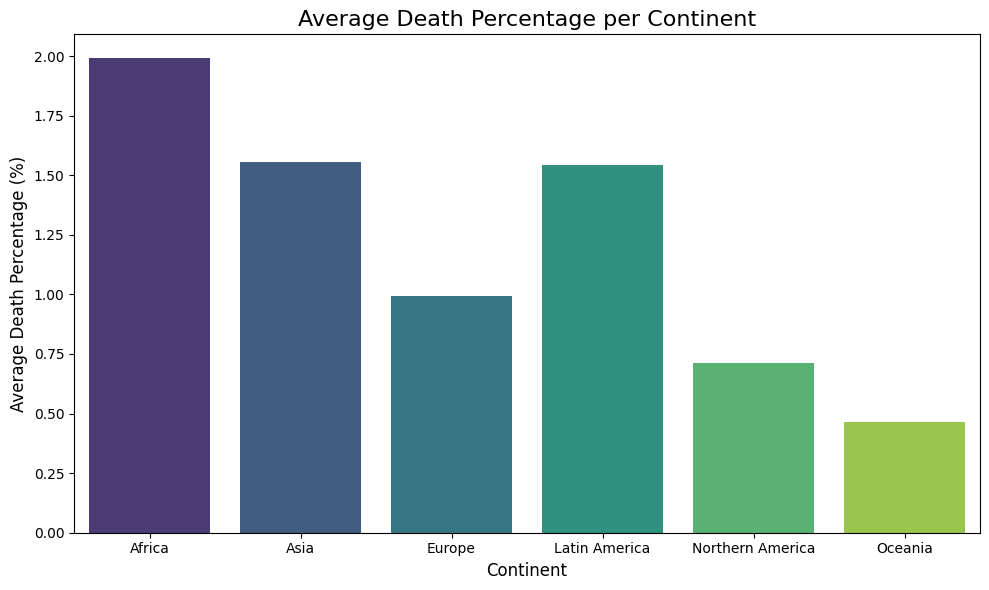

In [11]:
# Menghitung rata-rata Death percentage per Continent
continent_death_percentage = df.groupby("Continent")["Death percentage"].mean()

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x=continent_death_percentage.index, y=continent_death_percentage.values, palette="viridis")

# Menambahkan label dan judul
plt.title("Average Death Percentage per Continent", fontsize=16)
plt.xlabel("Continent", fontsize=12)
plt.ylabel("Average Death Percentage (%)", fontsize=12)
plt.xticks(
    ticks=range(len(continent_death_percentage.index)),
    labels=["Africa", "Asia", "Europe", "Latin America", "Northern America", "Oceania"],
    fontsize=10
)

# Menampilkan plot
plt.tight_layout()
plt.show()

# **Data Transformation**

In [12]:
# Inisialisasi encoder
label_encoder = LabelEncoder()

# Encode kolom kategoris
df['Continent'] = label_encoder.fit_transform(df['Continent'])

# Lihat hasilnya
df.head()

,Population,Continent,Total Cases,Total Deaths,TtlCasesPer1MPop,TtlDeathsPer1MPop,Death percentage
0,40462186,1,177827,7671,4395,190,4.313743
1,2872296,2,273870,3492,95349,1216,1.275058
2,45236699,0,265691,6874,5873,152,2.587216
3,77481,2,40024,153,516565,1975,0.382271
4,34654212,0,99194,1900,2862,55,1.915438


In [13]:
df['Death percentage'] = df['Death percentage'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Population         225 non-null    int64
 1   Continent          225 non-null    int64
 2   Total Cases        225 non-null    int64
 3   Total Deaths       225 non-null    int64
 4   TtlCasesPer1MPop   225 non-null    int64
 5   TtlDeathsPer1MPop  225 non-null    int64
 6   Death percentage   225 non-null    int64
dtypes: int64(7)
memory usage: 12.4 KB


# **Data Preparation**

In [14]:
sc = MinMaxScaler()
df2 = pd.DataFrame(sc.fit_transform(df), columns=['Population', 'Continent','Total Cases', 'Total Deaths', 'TtlCasesPer1MPop',
                                                  'TtlDeathsPer1MPop', 'Death percentage'])
df2.head()

,Population,Continent,Total Cases,Total Deaths,TtlCasesPer1MPop,TtlDeathsPer1MPop,Death percentage
0,0.028111,0.2,0.002173,0.007608,0.006301,0.030226,0.222222
1,0.001995,0.4,0.003346,0.003464,0.136976,0.193446,0.055556
2,0.031429,0.0,0.003246,0.006818,0.008425,0.024181,0.111111
3,0.000053,0.4,0.000489,0.000152,0.742141,0.314190,0.000000
4,0.024076,0.0,0.001212,0.001885,0.004099,0.008750,0.055556


# **Clustering**

## **K-Means**

In [15]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans
# set the parameter for evaluating K
sse = []
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df2)
    sse.append(kmeans.inertia_)

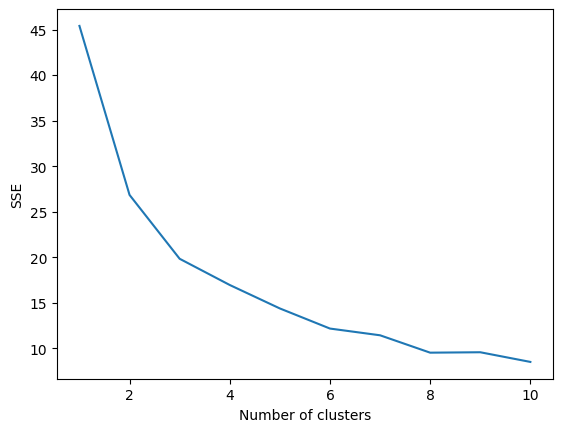

In [16]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [17]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print("The best k for your model is", kneedle.elbow)

The best k for your model is 3


In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df2)
y_pred

array([0, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1,
       0, 1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1,
       0, 0, 1, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 1, 1,
       1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1,
       2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1,
       0, 1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0,
       0, 0, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0], dtype=int32)

## **K-Means Visualization**

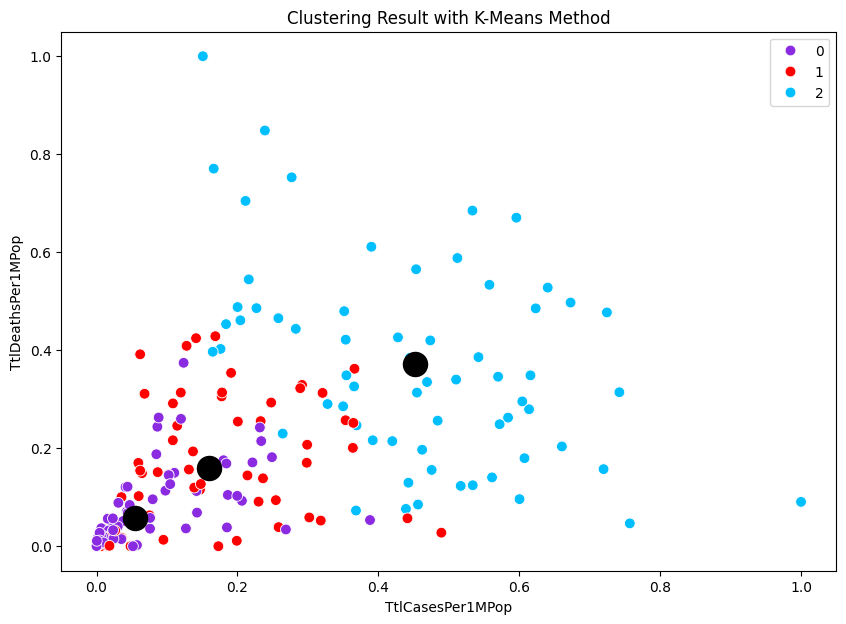

In [19]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))
sns.scatterplot(x = "TtlCasesPer1MPop", y = "TtlDeathsPer1MPop", hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df2, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 5], s=300, c="black")
plt.xlabel("TtlCasesPer1MPop")
plt.ylabel("TtlDeathsPer1MPop")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [20]:
# Inverse transform the scaled data to get the original values
df_inverse = pd.DataFrame(sc.inverse_transform(df2), columns=['Population', 'Continent','Total Cases', 'Total Deaths','TtlCasesPer1MPop', 'TtlDeathsPer1MPop', 'Death percentage'])
# Add the cluster labels to the original data
df_inverse['Kmeans'] = y_pred
# Analyze the clusters with the original values
df_inverse.head()

,Population,Continent,Total Cases,Total Deaths,TtlCasesPer1MPop,TtlDeathsPer1MPop,Death percentage,Kmeans
0,40462186.0,1.0,177827.0,7671.0,4395.0,190.0,4.0,0
1,2872296.0,2.0,273870.0,3492.0,95349.0,1216.0,1.0,1
2,45236699.0,0.0,265691.0,6874.0,5873.0,152.0,2.0,0
3,77481.0,2.0,40024.0,153.0,516565.0,1975.0,0.0,2
4,34654212.0,0.0,99194.0,1900.0,2862.0,55.0,1.0,0


In [21]:
kmeans_summary = df_inverse.groupby('Kmeans').agg({
    'TtlCasesPer1MPop': ['mean', 'std', 'min', 'max'],
    'TtlDeathsPer1MPop': ['mean', 'std', 'min', 'max'],
    'Death percentage': ['mean', 'std', 'min', 'max'],
    'Population': ['mean', 'std', 'min', 'max'],
    'Continent': [pd.Series.mode,'mean', 'std', 'min', 'max'],
    'Total Cases': ['mean', 'std', 'min', 'max'],
    'Total Deaths': ['mean', 'std', 'min', 'max']
})

kmeans_summary

TtlCasesPer1MPop                                    TtlDeathsPer1MPop  \
                   mean            std       min       max              mean   
Kmeans                                                                         
0          38222.636364   53870.315197      16.0  270208.0        357.707071   
1         111068.500000   85224.477339       9.0  340703.0       1000.564516   
2         314567.125000  123475.669574  105062.0  696044.0       2333.015625   

                                   Death percentage            ... Continent  \
                std    min     max             mean       std  ...       min   
Kmeans                                                         ...             
0        463.311885    0.0  2353.0         1.414141  2.294670  ...       0.0   
1        821.631835    0.0  2694.0         0.774194  1.014959  ...       2.0   
2       1294.580075  293.0  6286.0         0.609375  1.078170  ...       0.0   

              Total Cases                                    Total Deaths  \
        max          mean           std     min         max          mean   
Kmeans                                                                      
0       2.0  1.464848e+06  4.917557e+06     2.0  43029044.0  16345.161616   
1       5.0  5.085026e+05  1.251714e+06     1.0   6085926.0  10982.854839   
2       4.0  4.922324e+06  1.174315e+07  4150.0  81839052.0  60573.765625   

                                       
                  std  min        max  
Kmeans                                 
0        57432.444383  0.0   521388.0  
1        44506.912689  0.0   323212.0  
2       157338.498506  6.0  1008222.0  

[3 rows x 29 columns]

In [22]:
df_inverse.groupby(y_pred)['Kmeans'].agg(pd.Series.count)

,Kmeans
0,99
1,62
2,64


**Interpertasi**


*   Klaster 0 :

  1. TtlCasesPer1MPop (mean): 38,222 kasus per juta penduduk.
  2. TtlDeathsPer1MPop (mean): 357 kematian per juta penduduk.
  3. Death Percentage (mean): 1.41% (kematian dari total kasus).
  4. Jumlah Negara: 99 negara.
  5. Interpretasi: Negara-negara dalam kluster ini memiliki tingkat penyebaran virus yang rendah dengan persentase kematian juga rendah. Hal ini mencerminkan efektivitas kebijakan kesehatan masyarakat dan kesiapan sistem kesehatan.
  6. Saran :
      * Tetap pertahankan kebijakan pengendalian dan pencegahan seperti vaksinasi, pengujian massal, dan isolasi kasus.
      * Fokus pada memperkuat sistem kesehatan untuk menangani potensi lonjakan di masa depan.


*   Klaster 1

  1. TtlCasesPer1MPop (mean): 111,068 kasus per juta penduduk.
  2. TtlDeathsPer1MPop (mean): 1,000 kematian per juta penduduk.
  3. Death Percentage (mean): 0.77% (kematian dari total kasus).
  4. Jumlah Negara: 62 negara.
  5. Interpretasi: Negara-negara ini memiliki tingkat penyebaran virus yang lebih tinggi dibandingkan kluster 0, tetapi persentase kematian masih tergolong rendah. Hal ini menunjukkan sistem kesehatan yang baik, walaupun terdapat kebutuhan untuk mengendalikan jumlah kasus baru.
  6. Saran:
      * Perketat kebijakan pencegahan untuk mengurangi tingkat kasus baru.
      * Lakukan edukasi masyarakat tentang pentingnya protokol kesehatan, seperti memakai masker dan menjaga jarak.
      * Pastikan vaksinasi terus berjalan untuk memperkuat perlindungan terhadap virus.


*   Klaster 2
  1. TtlCasesPer1MPop (mean): 314,567 kasus per juta penduduk.
  2. TtlDeathsPer1MPop (mean): 2,333 kematian per juta penduduk.
  3. Death Percentage (mean): 0.61% (kematian dari total kasus).
  4. Jumlah Negara: 64 negara.
  5. Interpretasi: Kluster ini terdiri dari negara-negara dengan tingkat penyebaran virus yang sangat tinggi. Walaupun persentase kematian terlihat lebih rendah dibandingkan kluster 0, jumlah absolut kasus dan kematian jauh lebih tinggi, yang mengindikasikan beban besar pada sistem kesehatan.

  6. Saran:
      * Tingkatkan kapasitas layanan kesehatan, termasuk rumah sakit dan fasilitas perawatan intensif.
      * Lakukan pembatasan sosial lebih ketat untuk mengurangi penyebaran.
      * Jalankan program vaksinasi massal dan distribusi alat medis secara merata.

Kesimpulan Umum :
* Kluster 0: Memiliki persentase kematian tertinggi (1.41%) karena jumlah kasus yang rendah, sehingga setiap kematian lebih memengaruhi angka persentase.
* Kluster 1 dan 2: Meskipun persentase kematian lebih rendah (masing-masing 0.77% dan 0.61%), jumlah kasus yang tinggi berarti jumlah total kematian lebih besar.

Saran Keseluruhan:

* Fokus bantuan kesehatan sebaiknya diarahkan ke kluster 2, yang menghadapi beban tinggi baik dari kasus maupun kematian.
* Negara di kluster 0 dapat menjadi contoh baik untuk praktik pengendalian pandemi.
* Kluster 1 perlu fokus pada pengendalian penyebaran untuk mengurangi jumlah kasus baru.

## **Hierarchical**

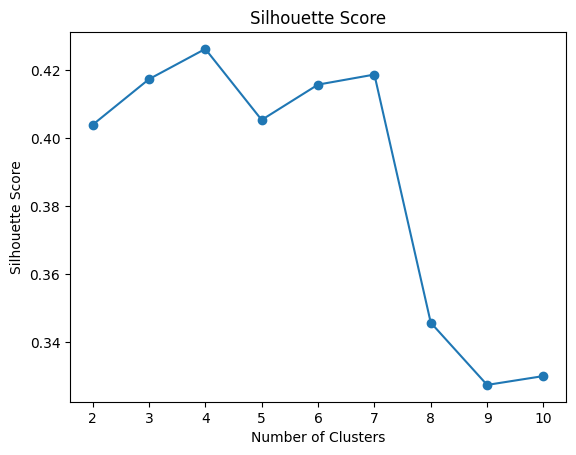

In [23]:
silhouette_scores = []

# The range was changed to start from 2, ensuring at least 2 clusters are formed.
for i in range(2, 11):
    cluster_labels = fcluster(linkage(df2, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df2, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o') # Adjusted x-axis range to match the loop
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

In [24]:
silhouette_scores = []
for k in range(2, 10):  # Mencoba jumlah cluster dari 2 hingga 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df2)  # X adalah dataset
    score = silhouette_score(df2, labels)
    silhouette_scores.append(score)
    print(f"Jumlah Cluster: {k}, Silhouette Score: {score}")

Jumlah Cluster: 2, Silhouette Score: 0.41891339776665504
Jumlah Cluster: 3, Silhouette Score: 0.4280148308695925
Jumlah Cluster: 4, Silhouette Score: 0.4132526927721401
Jumlah Cluster: 5, Silhouette Score: 0.41303683660366874
Jumlah Cluster: 6, Silhouette Score: 0.4276362304544607
Jumlah Cluster: 7, Silhouette Score: 0.3855225181353831
Jumlah Cluster: 8, Silhouette Score: 0.34949541322125427
Jumlah Cluster: 9, Silhouette Score: 0.3478978430235578


In [25]:
agglo = AgglomerativeClustering(n_clusters=3) # ikut sesuai k = 3
model2 = agglo.fit_predict(df2)

# Step 2: Add Agglomerative Clustering labels to the original DataFrame
df_inverse['agglo'] = model2

# show the df
df_inverse.head()

,Population,Continent,Total Cases,Total Deaths,TtlCasesPer1MPop,TtlDeathsPer1MPop,Death percentage,Kmeans,agglo
0,40462186.0,1.0,177827.0,7671.0,4395.0,190.0,4.0,0,1
1,2872296.0,2.0,273870.0,3492.0,95349.0,1216.0,1.0,1,1
2,45236699.0,0.0,265691.0,6874.0,5873.0,152.0,2.0,0,1
3,77481.0,2.0,40024.0,153.0,516565.0,1975.0,0.0,2,2
4,34654212.0,0.0,99194.0,1900.0,2862.0,55.0,1.0,0,1


In [26]:
agglo_summary = df_inverse.groupby('agglo').agg({
    'TtlCasesPer1MPop': ['mean', 'std', 'min', 'max'],
    'TtlDeathsPer1MPop': ['mean', 'std', 'min', 'max'],
    'Death percentage': ['mean', 'std', 'min', 'max'],
    'Population': ['mean', 'std', 'min', 'max'],
    'Continent': [pd.Series.mode,'mean', 'std', 'min', 'max'],
    'Total Cases': ['mean', 'std', 'min', 'max'],
    'Total Deaths': ['mean', 'std', 'min', 'max']
})

agglo_summary

TtlCasesPer1MPop                                    TtlDeathsPer1MPop  \
                  mean            std       min       max              mean   
agglo                                                                         
0        102217.430769   76094.007020       9.0  340703.0       1243.938462   
1         38795.595960   50634.389828      16.0  187113.0        375.919192   
2        333076.836066  109015.932187  105062.0  696044.0       2109.655738   

                                  Death percentage            ... Continent  \
               std    min     max             mean       std  ...       min   
agglo                                                         ...             
0      1068.760071    0.0  3423.0         1.015385  1.007663  ...       1.0   
1       471.587261    0.0  2353.0         1.393939  2.298261  ...       0.0   
2      1353.571127  293.0  6286.0         0.377049  1.002729  ...       0.0   

             Total Cases                                    Total Deaths  \
       max          mean           std     min         max          mean   
agglo                                                                      
0      5.0  3.528628e+06  1.201090e+07     1.0  81839052.0  57288.184615   
1      2.0  9.100076e+05  2.162064e+06     2.0  14894731.0  10994.181818   
2      3.0  2.821709e+06  5.574539e+06  4150.0  25997852.0  22355.295082   

                                      
                 std  min        max  
agglo                                 
0      168863.901330  0.0  1008222.0  
1       25880.349074  0.0   155288.0  
2       45835.214000  6.0   212328.0  

[3 rows x 29 columns]

In [27]:
df_inverse.groupby("agglo")["agglo"].agg(pd.Series.count)

,agglo
agglo,
0,65
1,99
2,61


## **Hierarchical Visualization**

### **Single Linkage**

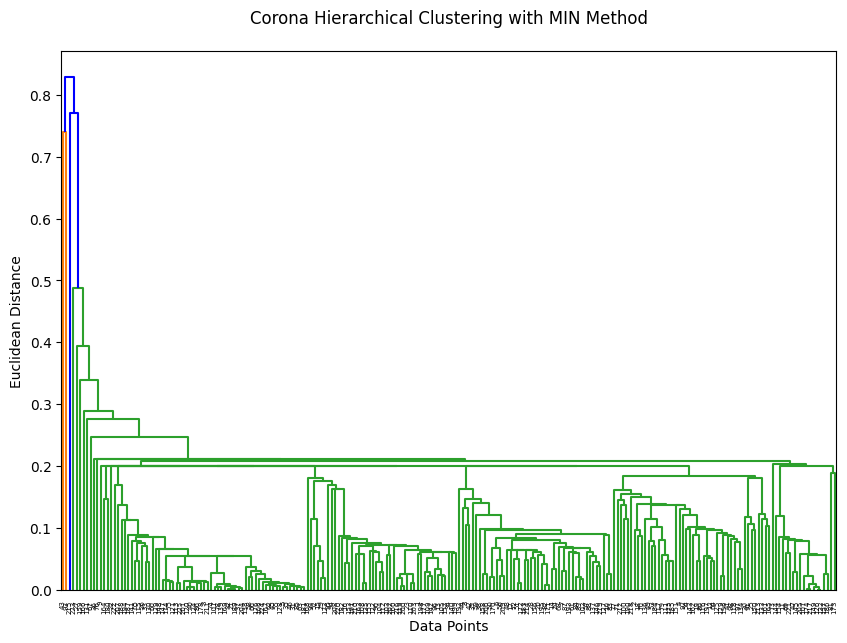

In [28]:
# Buat linkage matrix
linked = linkage(df2, method='single')

# Tentukan jumlah cluster yang diinginkan
n_clusters = 3

# Gunakan fcluster untuk mendapatkan label cluster
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

# Tentukan color_threshold agar sesuai dengan pemotongan
color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,  # Menentukan ketinggian pemotongan sesuai jumlah cluster
           above_threshold_color='blue',     # Warna cabang di atas threshold
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Corona Hierarchical Clustering with MIN Method", pad=20)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

### **Complete Linkage**

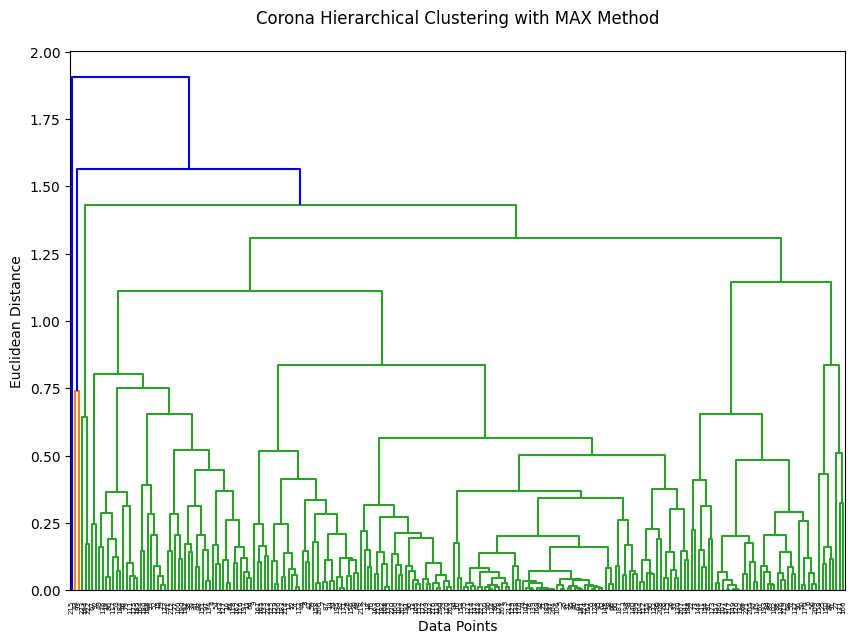

In [29]:
# Max Distance
linked = linkage(df2, method='complete', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='blue',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Corona Hierarchical Clustering with MAX Method", pad=20)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

### **Avarage Linkage**

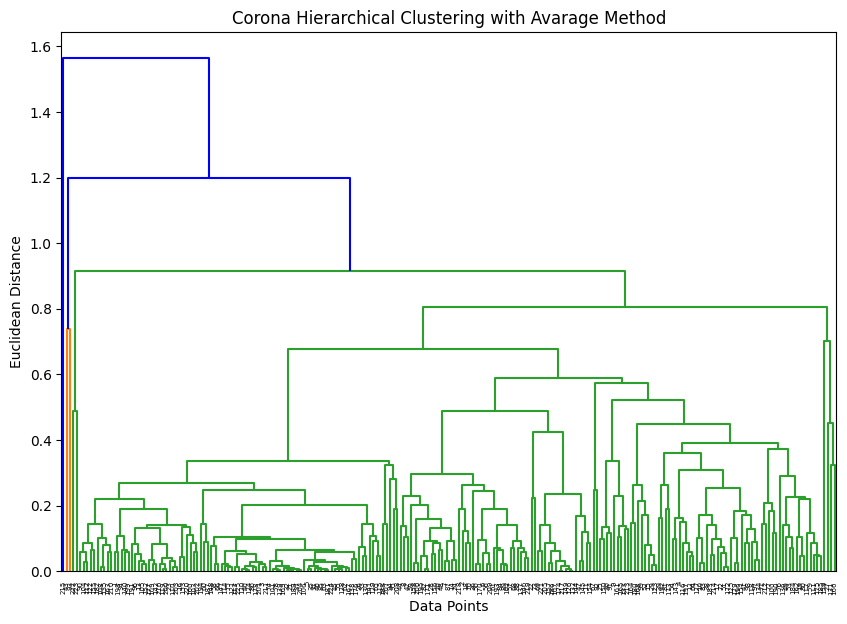

In [30]:
linked = linkage(df2, method='average', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='blue',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Corona Hierarchical Clustering with Avarage Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

### **Ward Linkage**

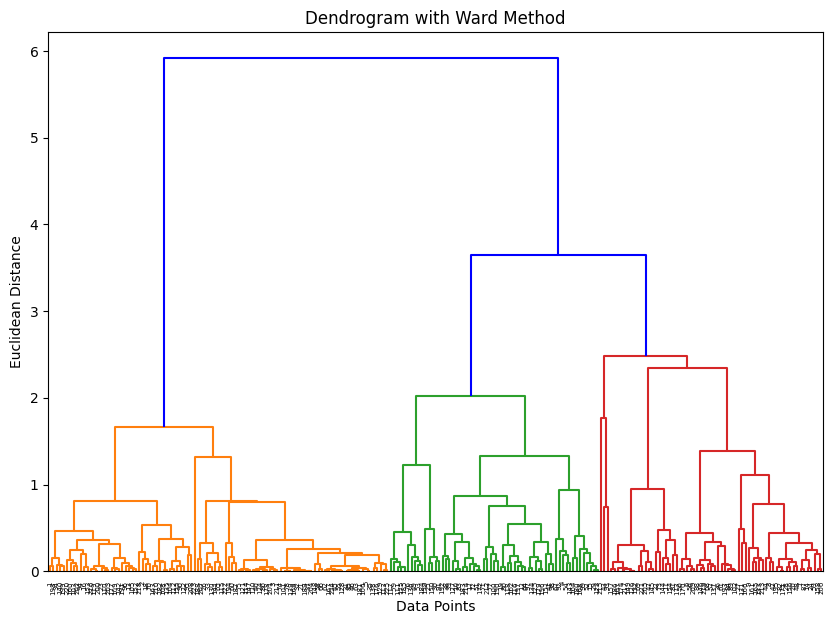

In [31]:
linked = linkage(df2, method='ward', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='blue',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

**Interpertasi Hierarchical**


*   Klaster 0 :

  1. TtlCasesPer1MPop (mean): 102,217 kasus per juta penduduk.
  2. TtlDeathsPer1MPop (mean): 1,243 kematian per juta penduduk.
  3. Death Percentage (mean): 1.01% (kematian dari total kasus).
  4. Jumlah Negara: 65 negara.
  5. Interpretasi: Wilayah ini memiliki jumlah kasus per 1 juta populasi yang tergolong sedang namun tingkat kematiannya cukup tinggi. Cluster ini kemungkinan terdiri dari negara-negara dengan sistem kesehatan yang terbatas, yang membuat tingkat kematian lebih tinggi meskipun jumlah kasus tidak terlalu ekstrem.
  6. Saran :
      * Perlu ada peningkatan kapasitas sistem kesehatan untuk menurunkan angka kematian.
      * Dukungan internasional, seperti bantuan alat kesehatan atau program pelatihan medis, dapat ditingkatkan untuk membantu negara-negara dalam cluster ini.


*   Klaster 1

  1. TtlCasesPer1MPop (mean): 111,068 kasus per juta penduduk.
  2. TtlDeathsPer1MPop (mean): 1,000 kematian per juta penduduk.
  3. Death Percentage (mean): 0.77% (kematian dari total kasus).
  4. Jumlah Negara: 99 negara.
  5. Interpretasi: Negara-negara di cluster ini menunjukkan angka kasus dan kematian per populasi yang rendah. Meskipun angka-angka ini rendah, persentase kematian sedikit lebih tinggi dibandingkan cluster lainnya, kemungkinan karena sistem pelaporan atau kapasitas penanganan medis yang terbatas.
  6. Saran:
      * Meskipun jumlah kasus rendah, perlu ada investigasi lebih lanjut mengapa persentase kematian tetap tinggi.
      * Negara-negara ini dapat diuntungkan dari program pencegahan penyakit yang lebih baik, seperti edukasi masyarakat dan vaksinasi.


*   Klaster 2
  1. TtlCasesPer1MPop (mean): 333,076 kasus per juta penduduk.
  2. TtlDeathsPer1MPop (mean): 2,109 kematian per juta penduduk.
  3. Death Percentage (mean): 0.38%. (kematian dari total kasus).
  4. Jumlah Negara: 61 negara.
  5. Interpretasi: Cluster ini terdiri dari negara-negara dengan angka kasus dan kematian yang sangat tinggi, namun persentase kematian relatif rendah. Hal ini dapat menunjukkan bahwa negara-negara di cluster ini memiliki sistem kesehatan yang baik, yang mampu menangani jumlah kasus yang besar dengan lebih efektif.
  6. Saran:
      * Fokus pada mempertahankan efektivitas sistem kesehatan untuk menangani kasus yang tinggi.
      * Bisa menjadi contoh untuk cluster lainnya dalam hal pengelolaan kasus besar dan penyediaan layanan kesehatan yang efisien.
      
Kesimpulan Umum :
* Cluster 0 terdiri dari wilayah dengan jumlah kasus sedang namun angka kematian per 1 juta populasi tergolong tinggi (persentase kematian sekitar 1.01%). Wilayah ini kemungkinan menghadapi tantangan besar dalam kapasitas sistem kesehatan untuk menangani wabah, sehingga memerlukan perhatian khusus untuk meningkatkan fasilitas medis dan sumber daya kesehatan.

* Cluster 1 meliputi wilayah dengan angka kasus dan kematian yang relatif rendah. Namun, persentase kematian yang sedikit lebih tinggi (1.39%) menunjukkan kemungkinan adanya keterbatasan dalam pelaporan data atau kendala dalam respons medis. Intervensi seperti pencegahan dan edukasi kesehatan masyarakat dapat membantu mengurangi risiko lebih lanjut.

* Cluster 2 mencakup wilayah dengan angka kasus dan kematian yang sangat tinggi, tetapi persentase kematian rendah (0.38%). Hal ini mengindikasikan bahwa wilayah ini memiliki sistem kesehatan yang lebih baik dalam menangani jumlah kasus besar, dengan tingkat efektivitas pengobatan dan penanganan yang tinggi.
